In [4]:
#様々なデータの読み込み方法について(csv以外のtsvとかjsonとか)
#tsvはread_csvの引数にsep = '/t'を追加
import pandas as pd
df = pd.read_csv('datafiles/bike.tsv',sep='\t')

In [5]:
df.head()

,dteday,holiday,weekday,workingday,weather_id,cnt
0,2011-01-01,0,6,0,2,985
1,2011-01-02,0,0,0,2,801
2,2011-01-03,0,1,1,1,1349
3,2011-01-04,0,2,1,1,1562
4,2011-01-05,0,3,1,1,1600


In [17]:
#文字コードの指定
#読み込み元のデータの文字コードがUTF-8以外の場合はそれを明示して読み込む必要がある
#df2 = pd.read_csv('datafiles/weather.csv') はエラー
weather = pd.read_csv('datafiles/weather.csv',encoding = 'shift-jis')

In [18]:
weather.head()

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


In [12]:
#jsonの読み込み
tmp = pd.read_json('datafiles/temp.json')

In [14]:
tmp.head() #列と行が逆転している

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
atemp,0.363625,0.353739,0.189405,0.212122,0.22927,0.233209,0.208839,0.162254,0.116175,0.150888,...,0.236113,0.259471,0.2589,0.294465,0.220333,0.226642,0.255046,0.2424,0.2317,0.223487
dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31
hum,0.805833,0.696087,0.437273,0.590435,0.436957,0.518261,0.498696,0.535833,0.434167,0.482917,...,0.44125,0.515417,0.791304,0.734783,0.823333,0.652917,0.59,0.752917,0.483333,0.5775
temp,0.344167,0.363478,0.196364,0.2,0.226957,0.204348,0.196522,0.165,0.138333,0.150833,...,0.265833,0.245833,0.231304,0.291304,0.243333,0.254167,0.253333,0.253333,0.255833,0.215833
windspeed,0.160446,0.248539,0.248309,0.160296,0.1869,0.089565,0.168726,0.266804,0.36195,0.223267,...,0.407346,0.133083,0.07723,0.168726,0.316546,0.350133,0.155471,0.124383,0.350754,0.154846


In [15]:
#dfを転地する
tmp.T

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869
...,...,...,...,...,...
725,0.226642,2012-12-27,0.652917,0.254167,0.350133
726,0.255046,2012-12-28,0.59,0.253333,0.155471
727,0.2424,2012-12-29,0.752917,0.253333,0.124383
728,0.2317,2012-12-30,0.483333,0.255833,0.350754


In [21]:
#内部結合
#データフレームの共通の列に対して同じ値の行どうしを結合する

df2 = df.merge(weather,how='inner', on = 'weather_id')
df2.head()#weather_idに対応するwweather列が結合された

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
0,2011-01-01,0,6,0,2,985,曇り
1,2011-01-02,0,0,0,2,801,曇り
2,2011-01-07,0,5,1,2,1510,曇り
3,2011-01-08,0,6,0,2,959,曇り
4,2011-01-11,0,2,1,2,1263,曇り


In [22]:
#weatherごとのcntの平均
df2.groupby(['weather']).mean()['cnt']

weather
晴れ    4876.786177
曇り    4052.672065
雨     1803.285714
Name: cnt, dtype: float64

In [29]:
#外部結合
 #内部結合では結合できなかった行は削除される
 #結合できないときは欠損値として扱う結合が外部結合
tmp = tmp.T
tmp.loc[199:201,] #7-20のデータが欠損

,atemp,dteday,hum,temp,windspeed
199,0.747479,2011-07-19,0.650417,0.776667,0.1306
200,0.826371,2011-07-21,0.69125,0.815,0.222021
201,None,2011-07-22,0.580417,0.848333,0.1331


In [30]:
#外部結合を行う
df3 = df2.merge(tmp,how = 'left', on = 'dteday')

In [32]:
df3[df3['dteday'] == '2011-07-20'] #tmpのデータがNaNとして追加されている

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
370,2011-07-20,0,3,1,1,4332,晴れ,NaN,NaN,NaN,NaN


<AxesSubplot:>

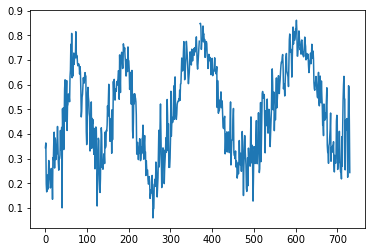

In [33]:
#線形補完
 #時系列データに対する補間方法

#時系列データの折れ線グラフ表示
%matplotlib inline
df3['temp'].plot(kind='line')

<AxesSubplot:>

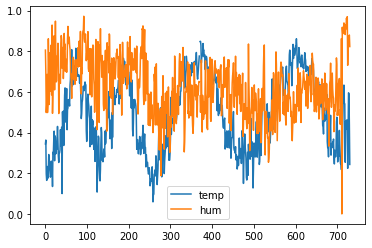

In [35]:
df3[['temp','hum']].plot(kind='line') #複数データの表示 複数の列をしていする場合は2重リストを使う

<AxesSubplot:ylabel='Frequency'>

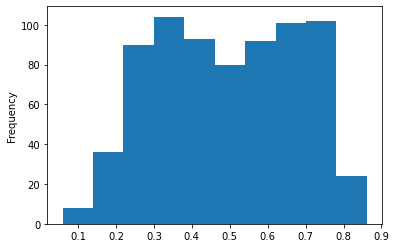

In [36]:
#ヒストグラムの描画
df3['temp'].plot(kind='hist')

<AxesSubplot:>

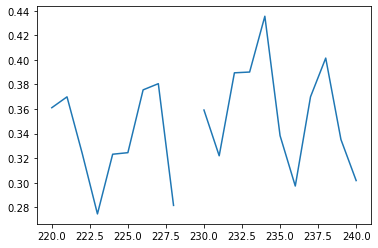

In [38]:
#欠損値
df3['atemp'].loc[220:240,].plot(kind='line')

<AxesSubplot:>

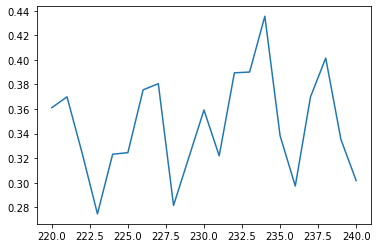

In [42]:
#欠損値の前後の値を考慮して欠損を埋める
df3['atemp'] = df3['atemp'].astype(float) #データの方をfloatに変更
df3['atemp'] = df3['atemp'].interpolate() #欠損値を線形補間
df3.loc[220:240,'atemp'].plot(kind='line')

In [ ]:
#欠損値を回帰で求める方法もある→前処理段階でMLを使う